## Neural Networks with Tensor Flow

A Computational Neural Network is a computing technique which is capable of being trained on data of interests and provide predictions based on input.

INPUT LAYER -> HIDDEN LAYERS(COMPOSED OF OTHER INPUT->OUTPUT LAYERS) -> OUTPUT LAYERS

BIAS INPUT NODE independent of INPUT LAYERS to connect to NEXT Layer

### Activation Functions

- RELU (Rectified Linear Unit)
    - Negative Values : Zero
    - Positive Values : Scaled
- Tanh (Hyperbolic Tangent) -
    - Scales values in range (-1, 1)
- Sigmioid
    - Scales values in range (0, 1)
    - $\phi (z) = \dfrac{1}{1+e^{-z}}$

### Optimizer Functions

Algorithms used to implememet back propogation.
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient

*This article explains well
https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6


In [1]:
import tensorflow as tf
from tensorflow import keras

#Helpers
import numpy as np
import matplotlib.pyplot as plt


### Dataset

Fashipn MNIST Dataset


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#Number of images of pixels by pixels shape
train_images.shape

(60000, 28, 28)

In [4]:
## Look at one pixel
train_images[0, 23, 23]

##Value in grayscale range of 0-255
#0-white
#255 - black

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

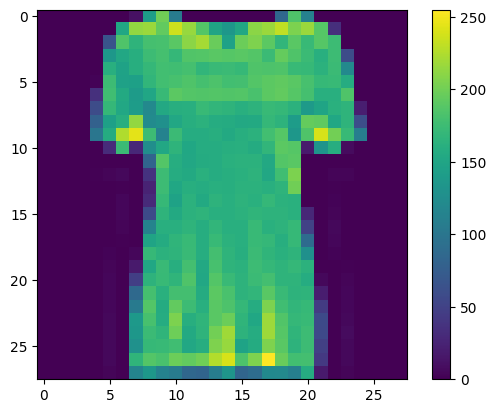

In [7]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

### Data Preprocessing


In [8]:
train_images = train_images/255.0

test_images = test_images/255.0

### Building the Model

In [9]:
## Implementing Sequential Neural Networks
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), #input layer
    keras.layers.Dense(128, activation = 'relu'), #hidden layer #128 nodes #rectified linear unit activation function
    keras.layers.Dense(10, activation = 'softmax') #output layer #softmax-will make sure all the values of neurons add to one
])

### Compile the Model


In [10]:
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']) 

### Training the Model

In [11]:
model.fit(train_images, train_labels, epochs = 1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4965 - accuracy: 0.8268


### Evaluate the Model

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)

313/313 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8457


In [13]:
print('Test accuracy : ', test_acc)

Test accuracy :  0.8457000255584717


Accuracy found for testing data lower than training data. This could be indicating overfitting on training data.

Try tweaking numer of epochs to check accuracy

## Prediction

In [14]:
predictions = model.predict(test_images)




313/313 [==============================] - 0s 928us/step


[1.4479151e-05 9.2902775e-07 1.1395215e-05 6.7827345e-06 1.5795987e-06
 6.3206971e-02 5.7508082e-06 1.2466963e-01 5.0668539e-03 8.0701566e-01]
9
Ankle boot


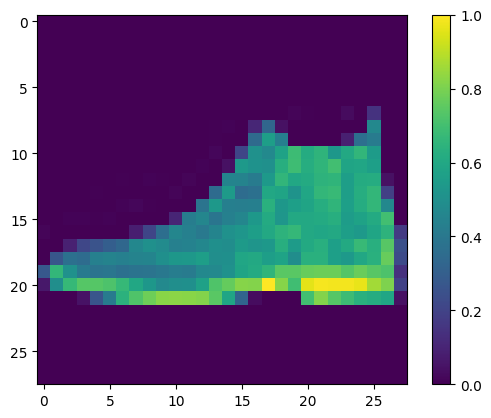

In [15]:
checkTest = 0
print(predictions[checkTest])
print(np.argmax(predictions[checkTest]))
print(class_names[np.argmax(predictions[checkTest])])
plt.figure()
plt.imshow(test_images[checkTest])
plt.colorbar()
plt.grid(False)
plt.show()

# Test the trained model

Pick a number: 0.4
Try again : 
Pick a number: 0.3
Try again : 
Pick a number: 0.2
Try again : 
Pick a number: 1
1/1 [==============================] - 0s 28ms/step
Expected: Pullover
Guess: Pullover


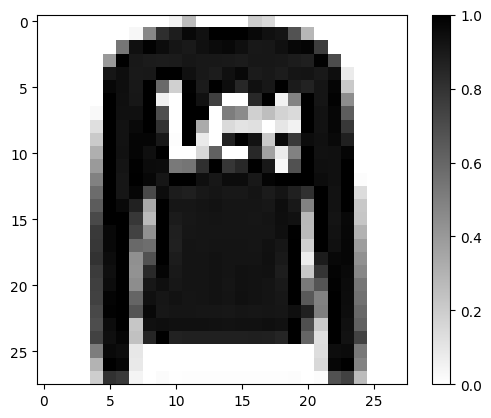

In [16]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    predictions = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(predictions)]
    
    show_image(image, class_names[correct_label], predicted_class)
    
def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap = plt.cm.binary)
    print("Expected: " +label)
    print("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0<= num <= 100:
                return int(num)
        else:
            print("Try again : ")
            
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
                